In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


import sys
sys.path.append("../lib/")
from pathlib import Path


In [2]:
dataset = "L_540_2022_C_E_R_B"
results_path = Path("../results/") / dataset
df = pd.read_csv(results_path / (dataset + "_preprocessed.csv"))
df = df.drop(columns=['file'], axis=1)


# Perform label encoding on the categorical variables
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split the data into features and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train the different classifiers
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


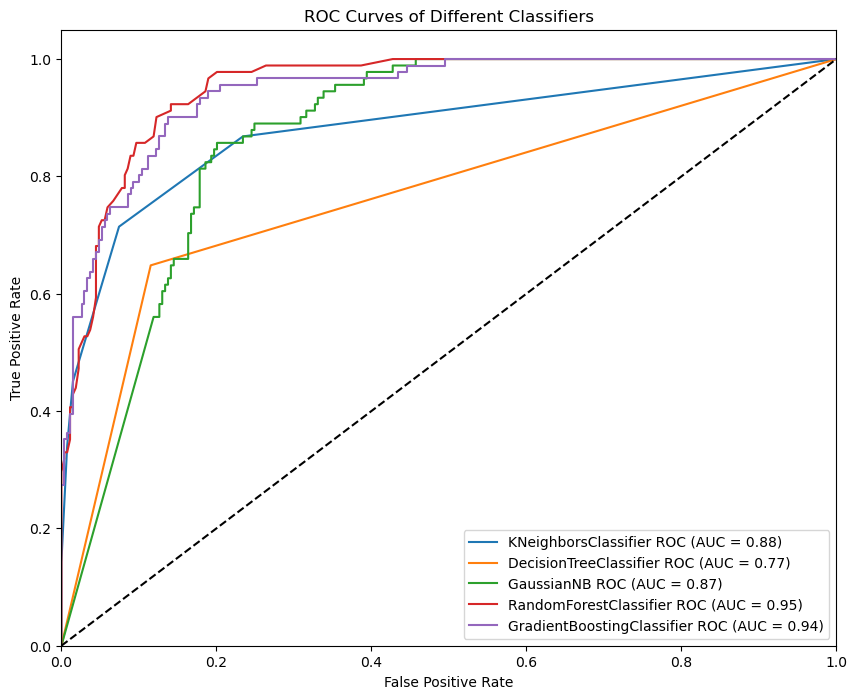

In [4]:
# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for clf in [knn, dt, nb, rf, gb]:
    y_prob = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (clf.__class__.__name__, roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Different Classifiers')
plt.legend(loc="lower right")
plt.show()


In [5]:
# Calculate the accuracy scores
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)

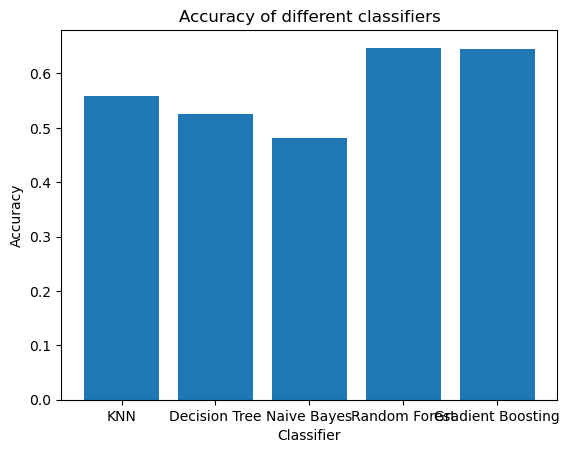

In [6]:
# Plot the accuracy scores
classifiers = ['KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Gradient Boosting']
accuracies = [acc_knn, acc_dt, acc_nb, acc_rf, acc_gb]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of different classifiers')
plt.show()

In [7]:
#https://scikit-learn.org/stable/modules/cross_validation.html
#https://scikit-learn.org/stable/modules/grid_search.html
#https://scikit-learn.org/stable/modules/model_evaluation.html

In [8]:
# Define the models
models = [
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(random_state=0),
    GaussianNB(),
    RandomForestClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
]

# Define the names of the models
names = [
    "k-Nearest Neighbors",
    "Decision Trees",
    "Naive Bayes",
    "Random Forest",
    "Gradient Boosting",
]

In [9]:
# Perform cross-validation for each model
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scores = []
for model in models:
    score = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    scores.append(score)